In [2]:
import numpy as np
import scipy.integrate as it
import matplotlib.pyplot as plt

# import sys
# sys.path.insert(0,r'C:\Users\mdk\Documents\Python Scripts\MNKappa')

import area as area

In [3]:
#general settings
interval = 1

# soortelijke massa beton
gam_c = 24 #kN/m³

#parameters girder
cs1 = area.Cross_section('test', [[0,0],[400,0],[400,1000],[0,1000]])
A = cs1.area*1e-6 #cross section area
h = cs1.height/1000 #m

L = 10
L_x = np.arange(0,L+interval,interval)

# reinforcement
A_strands = 50 #mm²
sigp_0 = 1235 #MPa
sigp_inf = 0.8*sigp_0 #MPa

reinf_strait = [[8*A_strands,h-0.04],[6*A_strands,h-0.08],[2*A_strands,h-0.115]] #vsp in rechte lijn [Ap,d]
ep_strait = [i[1]-h/2 for i in reinf_strait]

In [4]:
#loads
# Pm_strait = np.asarray([i[0]*sigp_inf * -10**-3 for i in reinf_strait])

qg = gam_c*A

# pointload
a_f = np.copy(L_x)
b_f = L-a_f
F = 100

#moments acting on girder
# M = 0.5 * (qg) * L_x * (L - L_x)
M = np.empty([1, L_x.size])
V = np.empty_like(M)
for i in np.nditer(a_f):
    b_f = L-i
    m = np.array([np.where(L_x<=i,F*b_f/L*L_x,(F*b_f/L*(i)-F*i/L*(L_x-i)))])
    v = np.gradient(m[0],L_x)
    M = np.append(M,m, axis=0)
    V = np.append(V,[v], axis=0)

M = M[1:,:].T
V = V[1:,:].T
print(M[:6,:])

"""
    |+--> 'a', position of force
    |:
M=  |:
    |v Moment at x

"""



[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.  90.  80.  70.  60.  50.  40.  30.  20.  10.   0.]
 [  0.  80. 160. 140. 120. 100.  80.  60.  40.  20.   0.]
 [  0.  70. 140. 210. 180. 150. 120.  90.  60.  30.   0.]
 [  0.  60. 120. 180. 240. 200. 160. 120.  80.  40.   0.]
 [  0.  50. 100. 150. 200. 250. 200. 150. 100.  50.   0.]]


"\n    |+--> 'a', position of force\n    |:\nM=  |:\n    |v Moment at x\n\n"

In [5]:
#plot variables
z = cs1.width_at_z()[::-1,1]-cs1.center_of_gravity

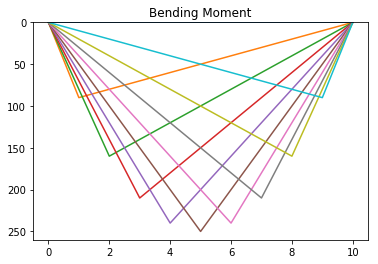

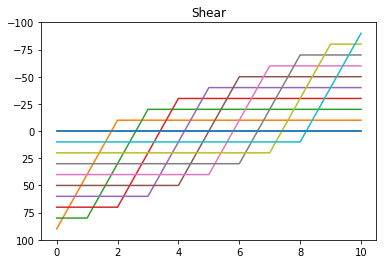

In [6]:
plt.title('Bending Moment')
plt.plot(L_x,M)
plt.ylim(M.max()+10,0)
plt.show()

plt.title('Shear')
plt.plot(L_x,V)
plt.ylim(V.max()+10,V.min()-10)
plt.show()

ultimate stress based on math: sig = M/w = 3.7500000000000004 MPa
difference is  -0.0 %


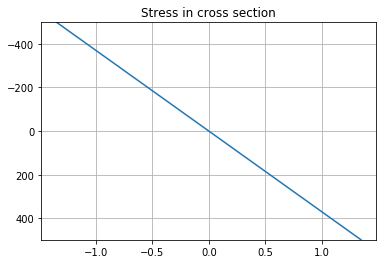

ultimate stress based on math: tau = (V*S)/(b*I) = [0.     0.3375 0.3    0.2625 0.225  0.1875 0.15   0.1125 0.075  0.0375
 0.    ] MPa
difference is  [nan  0.  0.  0.  0.  0.  0.  0.  0.  0. nan] %


C:\Users\mdk\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


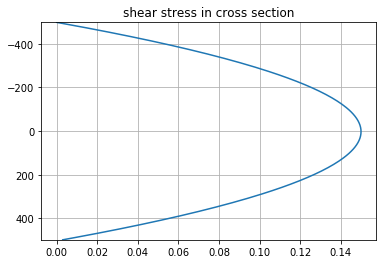

In [9]:
# verification of script (middle section)
sig_bend = np.outer(cs1.sig_bend_unit()[:,0], M*1e6)

print('ultimate stress based on math: sig = M/w =', M.max()*1e6/(1/6*400*1000**2), 'MPa')
print('difference is ', sig_bend[:,-1].max()/M.max()*1e6/(1/6*400*1000**2)*100, '%')
plt.title('Stress in cross section')
plt.plot(sig_bend[:,12], z)
plt.ylim(z.max(),z.min())
plt.grid(True)
plt.show()

tau = np.outer(cs1.tau_unit()[:,0], V*1e3)

print('ultimate stress based on math: tau = (V*S)/(b*I) =', (V[0]*1e3 * 0.5*400*500**2)/(1/12*400*1000**3*400), 'MPa')
print('difference is ', tau[:,0].max()/(V[0]*1e3 * 0.5*400*500**2)/(1/12*400*1000**3*400), '%')
plt.title('shear stress in cross section')
plt.plot(tau[:,12], z)
plt.ylim(z.max(),z.min())
plt.grid(True)
plt.show()

C:\Users\mdk\Documents\Python Scripts\MNKappa\area.py:131: RuntimeWarning: divide by zero encountered in true_divide
  theta = np.degrees(np.arctan((2 * tau / (sig_x - sig_z)) / 2))
C:\Users\mdk\Documents\Python Scripts\MNKappa\area.py:131: RuntimeWarning: invalid value encountered in true_divide
  theta = np.degrees(np.arctan((2 * tau / (sig_x - sig_z)) / 2))


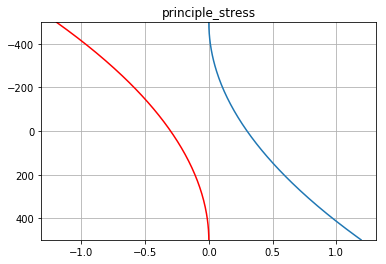

In [8]:
prin_stress = area.principle_stress_section(sig_bend[:,1:-1],tau[:,1:-1])

plt.title('principle_stress')
plt.plot(prin_stress[0][:,12], z)
plt.plot(prin_stress[1][:,12], z, 'r')
plt.ylim(z.max(),z.min())
plt.grid(True)
plt.show()